# Лабораторная работа 3

# Сычева Дарья, группа РИМ-181226
### Раздел курса на stepik - 4. Фильтрация изображений

### 4.1 Операция свертки. Линейные фильтры

In [49]:
import numpy as np
from skimage.io import imread, imshow
from skimage.color import rgb2gray
from skimage import img_as_ubyte
from scipy.signal import convolve2d
import matplotlib.pyplot as plt
%matplotlib inline

#### 4.1.1. Свертка

In [50]:
# выполняем свертку изображения
image = np.array([[0, -8, -3, -2], 
                [1, 9, -8, 0], 
                [9, -4, 5, -9], 
                [6, -4, 6, 3]])

core = np.array([[4, -5, 4], 
                   [-6, -8, -2], 
                   [1, 5, 5]])

print(convolve2d(core, image, mode='valid'))

[[  7 -88]
 [ 94  -7]]


#### 4.1.2. Box-фильтр.

#### Реализуйте box-фильтрацию изображения окном 5×5 пикселей. Дополнять изображение не нужно (т.е. изображение после фильтрации уменьшится). Прочитайте изображение из файла img.png и сохраните результат фильтрации в файл out_img.png. 

In [51]:
img = imread("https://stepik.org/media/attachments/lesson/61037/tiger-gray-small.png")
img2 = imread("https://stepik.org/media/attachments/lesson/61037/box-tiger.png")

In [52]:
def box_filter(img, size):
    res = np.zeros((img.shape[0]-size+1, img.shape[1]-size+1), dtype=np.int)

    for i in range (img.shape[0]-size+1):
        for j in range (img.shape[1]-size+1):

            a = 0
            for k in range (size):
                for n in range (size):
                    a = a + img[i + k, j + n]

            res [i, j] = int (a / size**2)
    return res

In [53]:
img = box_filter(img, 5)
np.array_equal(img2, img)

True

In [54]:
n = 5
img = imread("https://stepik.org/media/attachments/lesson/61037/tiger-gray-small.png")
res2 = convolve2d(rgb2gray(img), np.ones((n, n)), mode = "valid")
res2 = (res2/n/n).astype(np.uint8)
np.array_equal(img2, res2)

True

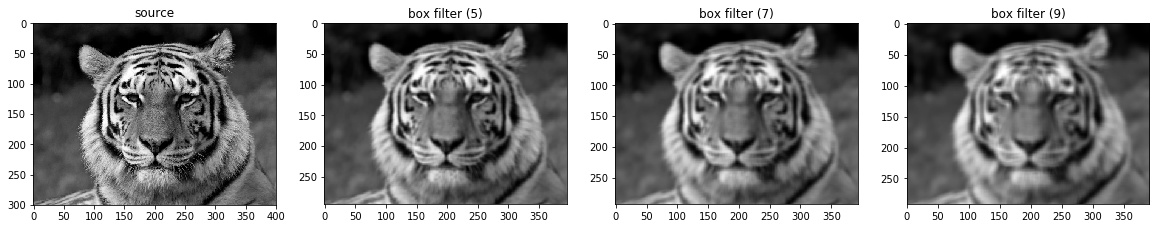

In [55]:
plt.figure(figsize=(20,5))
plt.set_cmap(cmap="gray")

plt.subplot(1,4,1)
plt.title("source")
plt.imshow(img)

plt.subplot(1,4,2)
plt.title("box filter (5)")
plt.imshow(box_filter(img, 5))

plt.subplot(1,4,3)
plt.title("box filter (7)")
plt.imshow(box_filter(img, 7))

plt.subplot(1,4,4)
plt.title("box filter (9)")
plt.imshow(box_filter(img, 9))
plt.show()

#### 4.1.3. Размер гауссовского фильтра
#### Какого размера (K) должен быть гауссовский фильтр для 𝜎=4?

In [56]:
4*2*3+1

25

#### 4.1.4. Подсчет функции Гаусса

#### На вход подаются три числа: 𝜎, 𝑥, 𝑦. Подсчитайте значение функции Гаусса в этой точке. 

In [57]:
def gauss_func(sigma, x, y):
    return 1/((2*np.pi)*sigma**2)*np.e**((-x**2 - y**2)/(2*sigma**2))

In [58]:
sigma, x, y = [1, 1, 1]
gauss_func(sigma, x, y)

0.05854983152431917

#### 4.1.5. Ядро гауссовского фильтра
#### На стандартный вход подается параметр 𝜎 гауссовского фильтра. Подсчитайте и напечатайте на стандартый вывод элементы ядра. Для подсчета значений функции Гаусса используйте функцию из предыдущего задания. 𝜎 может быть нецелым, тогда округлите 𝐾 с помощью функции round. Элементы ядра выводите с 5 цифрами после запятой.



In [59]:
def gauss_core(sigma):
    k = round(3*sigma)
    core = [[gauss_func(sigma, x, y) for x in range(-k, k+1)] for y in range(-k, k+1)]
    core = np.array(core)
    norm_core = core / np.sum(core, axis=(0,1))
    return norm_core

In [60]:
core = gauss_core(0.33)
print('\n'.join([' '.join(['{:.5f}'.format(item) for item in row]) for row in core]))

0.00010 0.00974 0.00010
0.00974 0.96065 0.00974
0.00010 0.00974 0.00010


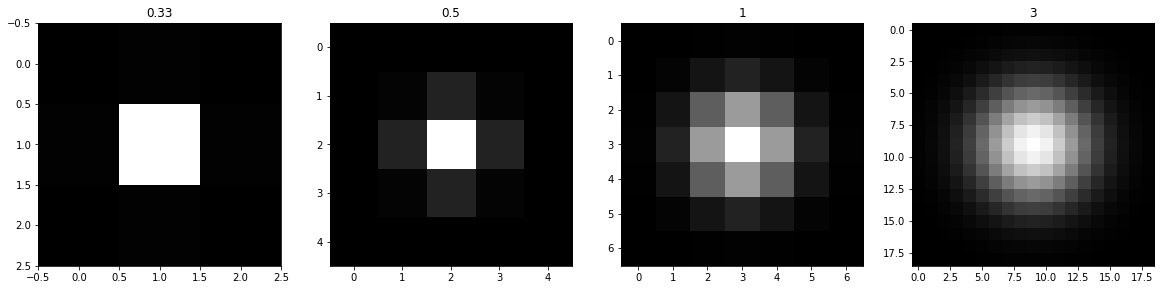

In [61]:
plt.figure(figsize=(20,5))

plt.subplot(1,4,1)
plt.title("0.33")
plt.imshow(gauss_core(0.33))

plt.subplot(1,4,2)
plt.title("0.5")
plt.imshow(gauss_core(0.5))

plt.subplot(1,4,3)
plt.title("1")
plt.imshow(gauss_core(1))

plt.subplot(1,4,4)
plt.title("3")
plt.imshow(gauss_core(3))
plt.show()

#### 4.1.6. Гауссовская фильтрация.
#### Профильтруйте изображение гауссовским ядром с 𝜎=0.66. Для подсчета ядра используйте функцию из предыдущего задания. При подсчете новых значений изображения не забывайте обрезать их с помощью numpy.clip. Дополнять изображение не нужно (т.е. изображение после фильтрации уменьшится).

In [62]:
img = imread("https://stepik.org/media/attachments/lesson/61037/tiger-gray-small.png")
img2 = imread("https://stepik.org/media/attachments/lesson/61037/gaussian-tiger.png")

In [63]:
sigma = 0.66
core = gauss_core(sigma)
img = convolve2d(img, core, mode='valid').astype('uint8')

In [64]:
np.array_equal(img2, img)

True

In [65]:
img = imread("https://stepik.org/media/attachments/lesson/61037/tiger-gray-small.png")
img066 = convolve2d(img, gauss_core(0.66), mode='valid').astype('uint8')
img3 = convolve2d(img, gauss_core(3), mode='valid').astype('uint8')

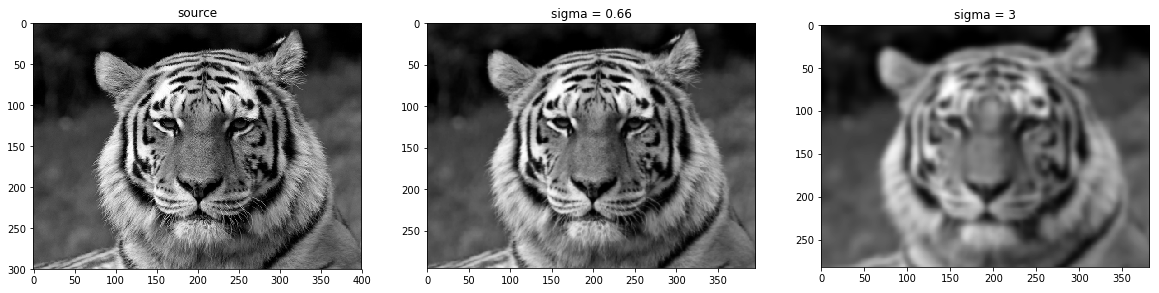

In [66]:
plt.figure(figsize=(20,5))
plt.set_cmap(cmap="gray")

plt.subplot(1,3,1)
plt.title("source")
plt.imshow(img)

plt.subplot(1,3,2)
plt.title("sigma = 0.66")
plt.imshow(img066)

plt.subplot(1,3,3)
plt.title("sigma = 3")
plt.imshow(img3)
plt.show()

#### Реализуйте повышение четкости изображения путём фильтрации изображения. При подсчете новых значений изображения не забывайте обрезать их с помощью numpy.clip. Дополнять изображение не нужно (т.е. изображение после фильтрации уменьшится).

In [67]:
img = imread('https://stepik.org/media/attachments/lesson/61037/tiger-gray-small.png')
img2 = imread('https://stepik.org/media/attachments/lesson/61037/unsharp-tiger.png')

In [68]:
def sharpening(img):
    res = np.array([[[0] * img.shape[1]] * img.shape[0]], dtype='float')[0]

    core = np.array([[-1, -2, -1],
                       [-2, 22, -2],
                       [-1, -2, -1]]) / 10

    for i in range(3, img.shape[0] + 1):
        for j in range(3, img.shape[1] + 1):
            res[i - 3, j - 3] = (img[i-3: i, j-3: j] * core).sum()


    res = np.clip(res[: - 2, : - 2], 0, 255).astype('uint8')
    return res

In [69]:
img = sharpening(img)
np.array_equal(img2, img)

True

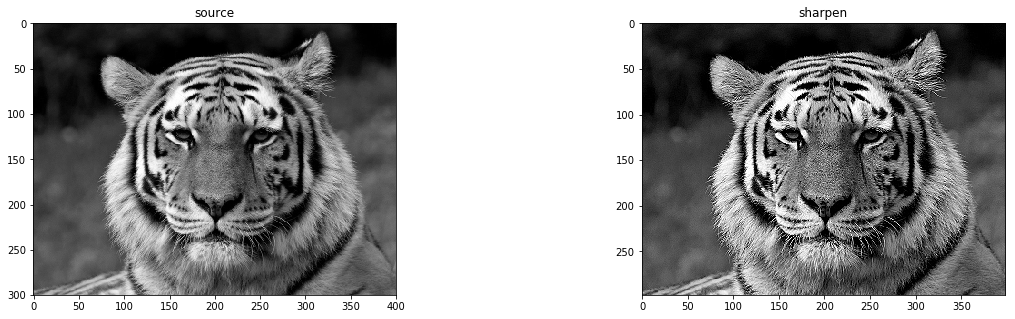

In [70]:
img = imread('https://stepik.org/media/attachments/lesson/61037/tiger-gray-small.png')

plt.figure(figsize=(20,5))
plt.set_cmap(cmap="gray")

plt.subplot(1,2,1)
plt.title("source")
plt.imshow(img)

plt.subplot(1,2,2)
plt.title("sharpen")
plt.imshow(img2)

plt.show()

#### 4.2.1. Медианный фильтр
#### Реализуйте медианную фильтрацию изображения окном 7×7 пикселей. Дополнять изображение не нужно (т.е. изображение после фильтрации уменьшится).

In [71]:
img = imread('https://stepik.org/media/attachments/lesson/61041/tiger-gray-small.png')
img2 = imread('https://stepik.org/media/attachments/lesson/61041/median-tiger.png')

In [72]:
def median_filtration(img, size):
    res = img.copy()
    rows,cols = img.shape
    half = size//2 

    for i in range(half,rows-half):
        for j in range(half,cols-half):
            # 7х7
            a = img[i-half:i+half+1,j-half:j+half+1]
            m = np.median(a)
            res[i][j] = m

    res = res[half:rows-half,half:cols-half]
    return res

In [73]:
img = median_filtration(img, 7)

In [74]:
np.array_equal(img2, img)

True

In [77]:
from scipy.ndimage.filters import median_filter

img = imread('https://stepik.org/media/attachments/lesson/61041/tiger-gray-small.png')
res = median_filter(img ,size=7)[3:-3,3:-3]
np.array_equal(img2, res)

True

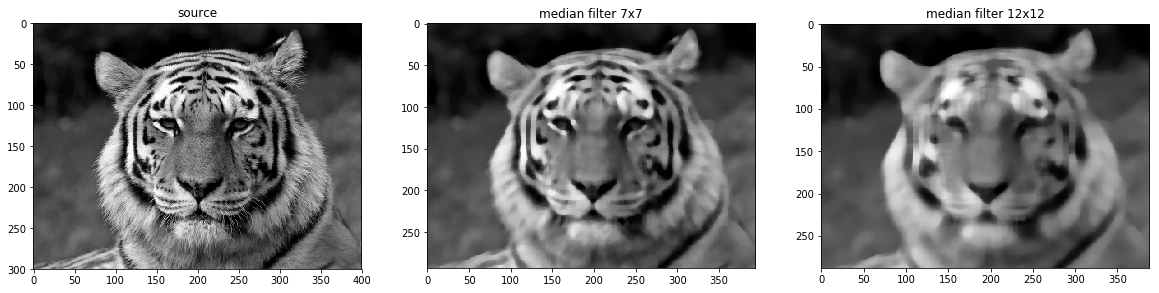

In [78]:
plt.figure(figsize=(20,10))
plt.set_cmap(cmap="gray")

plt.subplot(1,3,1)
plt.title("source")
plt.imshow(img)

plt.subplot(1,3,2)
plt.title("median filter 7x7")
plt.imshow(median_filtration(img ,size=7))

plt.subplot(1,3,3)
plt.title("median filter 12x12")
plt.imshow(median_filtration(img ,size=12))
plt.show()

#### 4.2.2. Медианный фильтр
#### Предположим, что мы хотим профильтровать изображение размером 600 строк и 800 столбцов с помощью алгоритма быстрой медианной фильтрации окном размера 7x7 пикселей. Будем накладывать окно так, чтобы оно не выходило за границы изображения (т.е. в результате фильтрации изображение уменьшится).

#### Сколько раз алгоритму потребуется инициализировать гистограмму H?

594

#### 4.2.3. Медианный фильтр
#### Сколько раз алгоритму потребуется обновить гистограмму H (т.е. сдвинуть окно на 1 пиксель вправо)?

471042